In [1]:
import pandas as pd


In [2]:
#Importing data into dataframe

df = pd.read_csv('../data/raw/fff_Bw_1min.dat', delim_whitespace=True)

print(df)

         2010  6   1  10  50  9.14  22.69  -1.42  -88  1.1    0  6.74e-04
0        2010  6   1  10  51  9.13  22.69  -1.43  -92    1  0.0  0.000765
1        2010  6   1  10  52  9.03   22.7  -1.44  -94    1  0.0  0.000699
2        2010  6   1  10  53  9.02   22.7  -1.45  -95    1  0.0  0.000786
3        2010  6   1  10  54  9.06  22.71  -1.46  -93    1  0.0  0.000748
4        2010  6   1  10  55  8.95  22.72  -1.48  -96    1  0.0  0.000933
...       ... ..  ..  ..  ..   ...    ...    ...  ...  ...  ...       ...
1659509  2018  2  28  14  56  9.87  23.44  -8.84  -94    2  2.0  0.001020
1659510  2018  2  28  14  57  9.93  23.45  -8.85  -90    2  2.0  0.001040
1659511  2018  2  28  14  58  9.96  23.45  -8.85 -100    2  2.0  0.001070
1659512  2018  2  28  14  59  9.92  23.46  -8.85 -111    2  2.0  0.001050
1659513  2018  2  28  15   0  9.98  23.46  -8.86 -120    1  2.0  0.001070

[1659514 rows x 12 columns]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Adding column names to dataframe

df.columns = ['year', 'month', 'day', 'hour', 'minute', 'L', 'MLT', 'MLAT', 'AL Index', 'KP Index', 'Satellite Flag', 'B']

df.head()

,year,month,day,hour,minute,L,MLT,MLAT,AL Index,KP Index,Satellite Flag,B
0,2010,6,1,10,51,9.13,22.69,-1.43,-92,1,0.0,0.000765
1,2010,6,1,10,52,9.03,22.7,-1.44,-94,1,0.0,0.000699
2,2010,6,1,10,53,9.02,22.7,-1.45,-95,1,0.0,0.000786
3,2010,6,1,10,54,9.06,22.71,-1.46,-93,1,0.0,0.000748
4,2010,6,1,10,55,8.95,22.72,-1.48,-96,1,0.0,0.000933


In [4]:
#Getting information about the data

for (columnName, columnData) in df.iteritems():
    print('Colunm Name : ', columnName)
    print('Column Contents : ', columnData.values)
    print('Unique Values :', columnData.unique())
    print("\n\n")
    

Colunm Name :  year
Column Contents :  [2010 2010 2010 ... 2018 2018 2018]
Unique Values : [2010 2011 2012 2013 2014 2015 2016 2017 2018]



Colunm Name :  month
Column Contents :  [6 6 6 ... 2 2 2]
Unique Values : [ 6  7  8  9 10 11 12  1  2  3  4  5]



Colunm Name :  day
Column Contents :  [ 1  1  1 ... 28 28 28]
Unique Values : [ 1  2  3  4  5  6  7 14 25  9 11 16 18 19 20 24 17 10 22 26 28 30 21 27
 31 13 23  8 12 15 29]



Colunm Name :  hour
Column Contents :  [10 10 10 ... 14 14 15]
Unique Values : [10 11 12 13 14  9 16 17 18 19 20  8  6 15  5  7 21 22 23  0  1  2  3  4]



Colunm Name :  minute
Column Contents :  [51 52 53 ... 58 59  0]
Unique Values : [51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50]



Colunm Name :  L
Column Contents :  [9.13 9.03 9.02 ... 9.96 9.92 9.98]
Unique Values : [ 9.13  9.03  9.02  9.06  8.95  8.93  8.9   8.87  8.86 

In [5]:
#Find missing and NaN values

print("\n Null Value counts :")
df.isnull().sum()


 Null Value counts :


year                   0
month                  0
day                    0
hour                   0
minute                 0
L                      0
MLT                    0
MLAT                   0
AL Index               0
KP Index               0
Satellite Flag         0
B                 255752
dtype: int64

In [6]:
print("\n NaN Value counts :")
df.isna().sum()


 NaN Value counts :


year                   0
month                  0
day                    0
hour                   0
minute                 0
L                      0
MLT                    0
MLAT                   0
AL Index               0
KP Index               0
Satellite Flag         0
B                 255752
dtype: int64

In [7]:
import seaborn as sns

print("\nCountplot of Year: ")
year_countplot = sns.countplot(x = "year", data = df)
print(year_countplot)


Countplot of Year: 
AxesSubplot(0.125,0.11;0.775x0.77)



Countplot of Month: 
AxesSubplot(0.125,0.125;0.775x0.755)


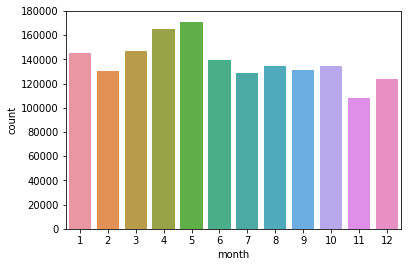

In [8]:
print("\nCountplot of Month: ")
month_countplot = sns.countplot(x = "month", data = df)
print(month_countplot)

In [9]:
# Converting year + month + day + hour + minute + second to datetime

datetime = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

In [10]:
# Adding datetime column to dataframe

df.insert(0, "datetime", datetime, True)

print(df)

                   datetime  year  month  day  hour  minute     L    MLT  \
0       2010-06-01 10:51:00  2010      6    1    10      51  9.13  22.69   
1       2010-06-01 10:52:00  2010      6    1    10      52  9.03   22.7   
2       2010-06-01 10:53:00  2010      6    1    10      53  9.02   22.7   
3       2010-06-01 10:54:00  2010      6    1    10      54  9.06  22.71   
4       2010-06-01 10:55:00  2010      6    1    10      55  8.95  22.72   
...                     ...   ...    ...  ...   ...     ...   ...    ...   
1659509 2018-02-28 14:56:00  2018      2   28    14      56  9.87  23.44   
1659510 2018-02-28 14:57:00  2018      2   28    14      57  9.93  23.45   
1659511 2018-02-28 14:58:00  2018      2   28    14      58  9.96  23.45   
1659512 2018-02-28 14:59:00  2018      2   28    14      59  9.92  23.46   
1659513 2018-02-28 15:00:00  2018      2   28    15       0  9.98  23.46   

         MLAT  AL Index  KP Index  Satellite Flag         B  
0       -1.43       -92  

In [11]:
# Dropping useless columns

df = df.drop(['year', 'month', 'day', 'hour', 'minute', 'AL Index', 'KP Index', 'Satellite Flag'], axis=1)
print(df)

                   datetime     L    MLT  MLAT         B
0       2010-06-01 10:51:00  9.13  22.69 -1.43  0.000765
1       2010-06-01 10:52:00  9.03   22.7 -1.44  0.000699
2       2010-06-01 10:53:00  9.02   22.7 -1.45  0.000786
3       2010-06-01 10:54:00  9.06  22.71 -1.46  0.000748
4       2010-06-01 10:55:00  8.95  22.72 -1.48  0.000933
...                     ...   ...    ...   ...       ...
1659509 2018-02-28 14:56:00  9.87  23.44 -8.84  0.001020
1659510 2018-02-28 14:57:00  9.93  23.45 -8.85  0.001040
1659511 2018-02-28 14:58:00  9.96  23.45 -8.85  0.001070
1659512 2018-02-28 14:59:00  9.92  23.46 -8.85  0.001050
1659513 2018-02-28 15:00:00  9.98  23.46 -8.86  0.001070

[1659514 rows x 5 columns]


In [17]:
#Dropping NaN values
df = df.dropna()
print(df)

                   datetime     L    MLT  MLAT         B
0       2010-06-01 10:51:00  9.13  22.69 -1.43  0.000765
1       2010-06-01 10:52:00  9.03   22.7 -1.44  0.000699
2       2010-06-01 10:53:00  9.02   22.7 -1.45  0.000786
3       2010-06-01 10:54:00  9.06  22.71 -1.46  0.000748
4       2010-06-01 10:55:00  8.95  22.72 -1.48  0.000933
...                     ...   ...    ...   ...       ...
1659509 2018-02-28 14:56:00  9.87  23.44 -8.84  0.001020
1659510 2018-02-28 14:57:00  9.93  23.45 -8.85  0.001040
1659511 2018-02-28 14:58:00  9.96  23.45 -8.85  0.001070
1659512 2018-02-28 14:59:00  9.92  23.46 -8.85  0.001050
1659513 2018-02-28 15:00:00  9.98  23.46 -8.86  0.001070

[1403762 rows x 5 columns]


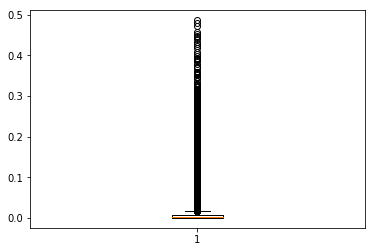

In [27]:
import matplotlib.pyplot as plt
B_box_plot = plt.boxplot(df['B'])

In [31]:
df_sorted = df.sort_values(by= 'B')
B_sorted = df_sorted['B']
print(B_sorted)

1563199    0.000121
1297665    0.000136
190729     0.000137
190780     0.000142
1535360    0.000145
             ...   
1497237    0.453000
1563198    0.457000
1007664    0.473000
1271061    0.479000
1037340    0.486000
Name: B, Length: 1403762, dtype: float64


(array([773., 580., 416., 398., 331., 198., 195., 143., 127., 101.,  78.,
         67.,  53.,  55.,  30.,  26.,  27.,  27.,  22.,   7.,  12.,   5.,
          6.,  12.,   8.,   9.,   6.,   6.,   3.,   1.,   3.,   7.,   4.,
          1.,   3.,   1.,   5.,   2.,   1.,   1.,   1.,   2.,   1.,   1.,
          2.,   2.,   0.,   0.,   1.,   2.]),
 array([0.125  , 0.13222, 0.13944, 0.14666, 0.15388, 0.1611 , 0.16832,
        0.17554, 0.18276, 0.18998, 0.1972 , 0.20442, 0.21164, 0.21886,
        0.22608, 0.2333 , 0.24052, 0.24774, 0.25496, 0.26218, 0.2694 ,
        0.27662, 0.28384, 0.29106, 0.29828, 0.3055 , 0.31272, 0.31994,
        0.32716, 0.33438, 0.3416 , 0.34882, 0.35604, 0.36326, 0.37048,
        0.3777 , 0.38492, 0.39214, 0.39936, 0.40658, 0.4138 , 0.42102,
        0.42824, 0.43546, 0.44268, 0.4499 , 0.45712, 0.46434, 0.47156,
        0.47878, 0.486  ]),
 <a list of 50 Patch objects>)

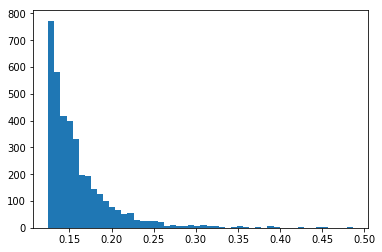

In [34]:
plt.hist(B_sorted[1400000:1403762], bins=50)